In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import style
style.use("ggplot")

In [14]:
# This loads the CSV data
data = pd.read_csv('corrected clustering raw_data.csv')
features = data.values

Text(0.5, 1.0, 'Original unclustered data')

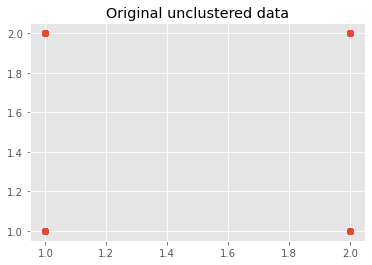

In [15]:
#plotting the dummy data
plt.scatter(features[:,0], features[:,1])
plt.title('Original unclustered data')

**Dimensionality reduction with PCA**

In [16]:
pca_out = PCA(n_components=5).fit(features)

# get the component variance
# Proportion of Variance (from PC1 to PC106)
pca_out.explained_variance_ratio_

array([0.29395542, 0.13855201, 0.12767094, 0.11119877, 0.0721807 ])

In [17]:
k = np.cumsum(pca_out.explained_variance_ratio_)
k[4]

0.743557840955215

In [18]:
pca_features = pca_out.fit_transform(features)
pca_features.shape

(7517, 5)

**K-Means algorithm**

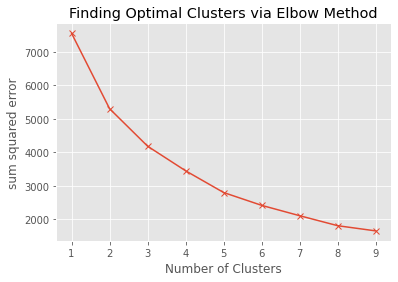

In [19]:
#training KMeans++ on K values from 1 to 10
loss =[]
for i in range(1, 10):
  km = KMeans(n_clusters = i, init='k-means++').fit(pca_features)
  loss.append(km.inertia_)

#printing loss against number of clusters
plt.plot(range(1, 10), loss, marker='x')
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('sum squared error')
plt.show()

In [24]:
#training KMeans++ model
kmeans = KMeans(n_clusters=124, init='k-means++')
kmeans.fit(pca_features)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
#print(centroids)
#print(labels)

In [25]:
targets = []
for i in range(len(pca_features)):
    #print("coordinate:",features[i], "label:", labels[i])
    targets.append(labels[i])

In [26]:
result = np.column_stack((pca_features, targets))

In [27]:
from numpy import savetxt
# save to csv file
savetxt('LabeledData.csv', result, delimiter=',')

**PCA 2D Plot**

In [ ]:
x1 = pca_features[:, 0]
x2 = pca_features[:, 1]

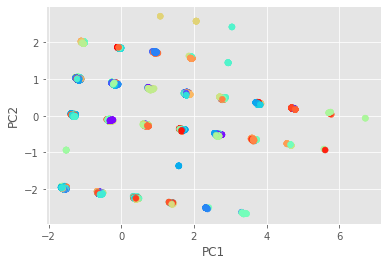

In [ ]:
plt.scatter(x1, x2, c=labels, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('PCA on the 4-Flow dataset')
#plt.show()
plt.savefig("2DPCA.pdf")

**Clustering 3D Plot**

Here, the PCA results are used with the class associated from the K-Means clustering

In [ ]:
# This loads the CSV data
data = pd.read_csv('LabeledData.csv', header=None)
data = data.values

In [ ]:
data_Y = data[:, 5]
data_Y = data_Y.astype(int)

In [ ]:
clusters = []
for k in range(6):
  data_c = data[data_Y.flatten() == k]
  for i in range(len(data_c)):
    clusters.append(data_c[i])
clusters = np.array(clusters)

In [ ]:
clusters.shape

(695, 6)

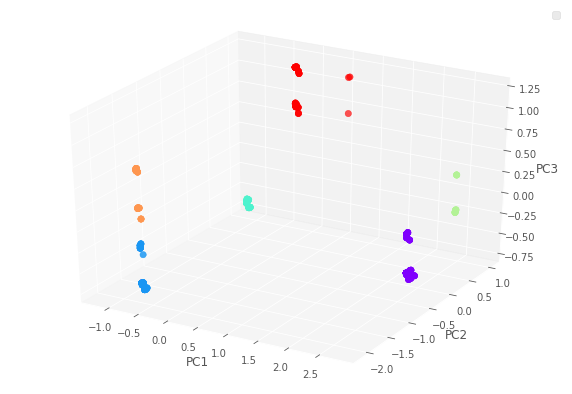

In [ ]:
x = clusters[:, 0]
y = clusters[:, 1]
z = clusters[:, 2]
labels = clusters[:, 5]
#print(labels)

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, c=labels, s=40, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_facecolor('white')
ax.legend()
#ax.set_title('PCA on the 4-Flow dataset')

# show plot
#plt.show()
plt.savefig('3DPCA.pdf')